In [33]:
# import dependancies
from torch import nn, optim 
from torchvision.datasets import MNIST
from torchvision import transforms as tfs
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
# import the dataset and transform it
transforms = tfs.Compose([tfs.ToTensor(), tfs.Normalize((0.5,), (0.5,))])
train_set = MNIST('./data', train=True, transform=transforms, download=True)
test_set = MNIST('./data', train=False, transform=transforms, download=True)

train_data = DataLoader(train_set, batch_size=64, shuffle=True)
test_data = DataLoader(test_set, batch_size=128, shuffle=False)

In [35]:
# define the network
class AutoEncoder(nn.Module):
    # takes a 28x28 image and passes it through a series of layers provided by the layers list
    #    layers: [int, int, ...]
    #        int: number of neurons in the layer
    def __init__(self, layers):
        super(AutoEncoder, self).__init__()
        # encoder
        self.encoder = nn.Sequential()        
        for i in range(len(layers)-1):
            self.encoder.add_module('encoder_{}'.format(i), nn.Linear(layers[i], layers[i+1]))
            self.encoder.add_module('encoder_relu_{}'.format(i), nn.ReLU())
        
        # decoder
        self.decoder = nn.Sequential()
        for i in range(len(layers)-1, 1, -1):
            self.decoder.add_module('decoder_{}'.format(i), nn.Linear(layers[i], layers[i-1]))
            self.decoder.add_module('decoder_relu_{}'.format(i), nn.ReLU())
        self.decoder.add_module('decoder_1', nn.Linear(layers[1], layers[0]))
        

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x
    
    def encode(self, x):
        return self.encoder(x)
    
    def decode(self, x):
        return self.decoder(x)

In [36]:
# define the training function
def train(net, train_data, epochs, lr=0.001, weight_decay=1e-5):
    optimizer = optim.Adam(net.parameters(), lr=lr, weight_decay=weight_decay)
    criterion = nn.MSELoss()
    
    running_losses = []
    for epoch in range(epochs):
        running_loss = 0.0
        for i, data in enumerate(train_data, 0):
            inputs, _ = data
            inputs = inputs.view(inputs.shape[0], -1)
            optimizer.zero_grad()
            
            outputs = net(inputs)
            loss = criterion(outputs, inputs)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            if i % 300 == 299:
                print('[{}, {}] loss: {}'.format(epoch+1, i+1, running_loss/300))
                running_losses.append(running_loss/300)
                running_loss = 0.0
    print('Finished Training')
    return running_losses

In [37]:
# define the testing function
def test(net, test_data):
    criterion = nn.MSELoss()
    test_loss = 0.0
    for i, data in enumerate(test_data, 0):
        inputs, _ = data
        inputs = inputs.view(inputs.shape[0], -1)
        
        outputs = net(inputs)
        loss = criterion(outputs, inputs)
        
        test_loss += loss.item()
    print('Test loss: {}'.format(test_loss/len(test_data)))
    return test_loss/len(test_data)

In [47]:
# define the personlized network function
def make_personlized_network(layers):
    net = AutoEncoder(layers)
    train_losses = train(net, train_data, 20)
    test_loss = test(net, test_data)
    return net, train_losses, test_loss

In [43]:
# define the display network results function
def display_network_results(net, train_losses, test_loss):
    plt.plot(train_losses)
    plt.title('Training Loss')
    plt.show()
    
    images, _ = next(iter(test_data))
    images = images.view(images.shape[0], -1)
    outputs = net(images)
    images = images.view(images.shape[0], 1, 28, 28)
    outputs = outputs.view(outputs.shape[0], 1, 28, 28)
    for i in range(10):
        plt.subplot(2, 10, i+1)
        plt.imshow(images[i][0], cmap='gray')
        plt.subplot(2, 10, i+11)
        plt.imshow(outputs[i][0].detach(), cmap='gray')
    plt.show()
    
    print('Test loss: {}'.format(test_loss))

In [44]:
# define the personlized network function
def personlized_network(layers):
    net, train_losses, test_loss = make_personlized_network(layers)
    display_network_results(net, train_losses, test_loss)
    return net

[1, 300] loss: 0.24688685139020283
[1, 600] loss: 0.15763091653585434
[1, 900] loss: 0.13921047282715637
[2, 300] loss: 0.1266493031879266
[2, 600] loss: 0.12049733104805152
[2, 900] loss: 0.11688431486487388
[3, 300] loss: 0.1133317418396473
[3, 600] loss: 0.1113163790355126
[3, 900] loss: 0.10974714788297812
[4, 300] loss: 0.10779570005834102
[4, 600] loss: 0.10620336872835955
[4, 900] loss: 0.10559290344516437
[5, 300] loss: 0.1038694916665554
[5, 600] loss: 0.10295302594701448
[5, 900] loss: 0.1021725625048081
[6, 300] loss: 0.10160433702170849
[6, 600] loss: 0.10004497538010279
[6, 900] loss: 0.09899327536424
[7, 300] loss: 0.09873102816442648
[7, 600] loss: 0.09814535496135553
[7, 900] loss: 0.09687888485689958
[8, 300] loss: 0.0966959502051274
[8, 600] loss: 0.0962045797954003
[8, 900] loss: 0.09517281666398049
[9, 300] loss: 0.09482180652519068
[9, 600] loss: 0.09436978826920192
[9, 900] loss: 0.09429294310510158
[10, 300] loss: 0.09322407508889834
[10, 600] loss: 0.09339494292

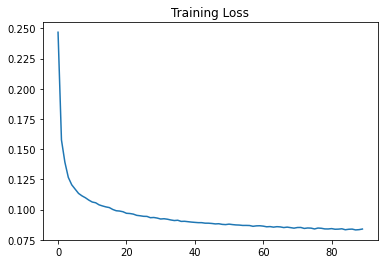

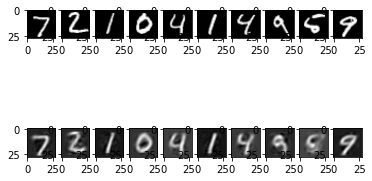

Test loss: 0.08223019813812232
[1, 300] loss: 0.2822821677227815
[1, 600] loss: 0.22552875116467475
[1, 900] loss: 0.21574219862620037
[2, 300] loss: 0.20937615911165874
[2, 600] loss: 0.20276254852612813
[2, 900] loss: 0.1972956203420957
[3, 300] loss: 0.19298245251178742
[3, 600] loss: 0.19161272962888082
[3, 900] loss: 0.18958029145995775
[4, 300] loss: 0.18751413350303966
[4, 600] loss: 0.18481086686253548
[4, 900] loss: 0.18298963829874992
[5, 300] loss: 0.18273862734436988
[5, 600] loss: 0.181277200927337
[5, 900] loss: 0.17876019939780236
[6, 300] loss: 0.1778961506485939
[6, 600] loss: 0.17796146924297016
[6, 900] loss: 0.17622935861349107
[7, 300] loss: 0.1755209308365981
[7, 600] loss: 0.17393504043420155
[7, 900] loss: 0.17489742875099182
[8, 300] loss: 0.17324198752641679
[8, 600] loss: 0.17320092822114627
[8, 900] loss: 0.17126567194859188
[9, 300] loss: 0.17072561929623287
[9, 600] loss: 0.16982908909519515
[9, 900] loss: 0.16976673096418382
[10, 300] loss: 0.168438870509

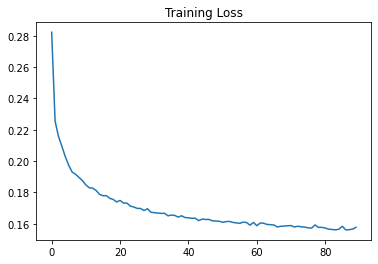

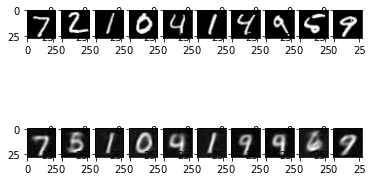

Test loss: 0.15575834976721414


In [46]:
# test the network
net = personlized_network([784, 128, 64, 12])

net = personlized_network([784, 128, 64, 12, 3])